In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive
from time import time

In [2]:
seed = 42

## Flip-Flop Problem

In [3]:
flipflop = mlrose_hiive.FlipFlopOpt(length=100)

In [4]:
%%time

# Randomized Hill Climb
flipflop_rhc = mlrose_hiive.RHCRunner(
    problem=flipflop, experiment_name="flip-flop-rhc",
    seed=seed, iteration_list=[10000],
    restart_list=[100], max_attempts=100
)
flipflop_rhc_stats, flipflop_rhc_curves = flipflop_rhc.run()

Flip Flop RHC Time Taken: 433.5593590736389s


In [6]:
best_index_in_curve = flipflop_rhc_curves.Fitness.idxmax()
best_decay = flipflop_rhc_curves.iloc[best_index_in_curve].current_restart
best_curve = flipflop_rhc_curves.loc[flipflop_rhc_curves.current_restart == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

14.0

Text(0, 0.5, 'Value')

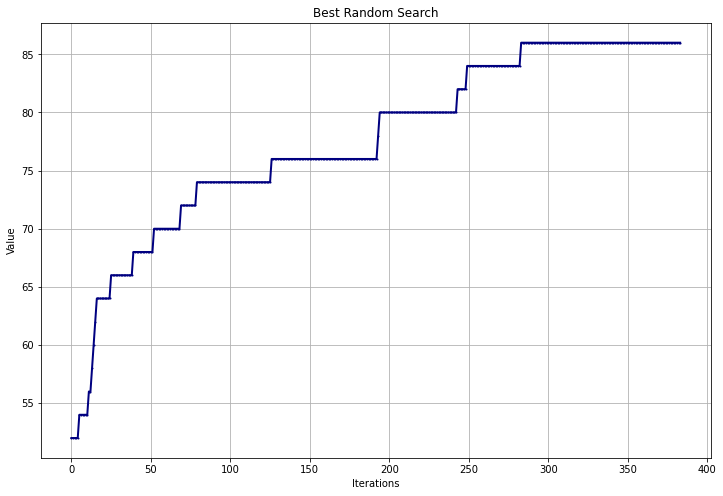

In [7]:
plot = best_curve.Fitness.plot(title='Randomized Hill Climb')
plot.set_xlabel("Iterations")
plot.set_ylabel("Value")
plt.show()

In [8]:
last_iters = flipflop_rhc_stats[flipflop_rhc_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.max())

79.61386138613861 86.0
189.4042582


In [4]:
start = time()
sa = mlrose_hiive.SARunner(flipflop, experiment_name="flip-flop-sa", 
                           iteration_list=[100000],
                           temperature_list=[1, 10, 50, 100, 250],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=seed, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()
end = time()
print(f"Flip Flop SA Time Taken: {end-start}s")

Flip Flop SA Time Taken: 125.01507496833801s


In [5]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.mean())

97.2 98.0
12.442907250000001


In [6]:
print(last_iters.loc[last_iters.schedule_init_temp == 1, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 10, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 50, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 100, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 250, "Time"].mean())
print(last_iters.loc[:, "Time"].mean())

5.218676450000004
16.688997649999997
23.971996999999995
7.273951000000011
9.060914150000002
12.442907250000001


In [7]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

ExpDecay(init_temp=1, exp_const=0.005, min_temp=0.001)

Text(0, 0.5, 'Value')

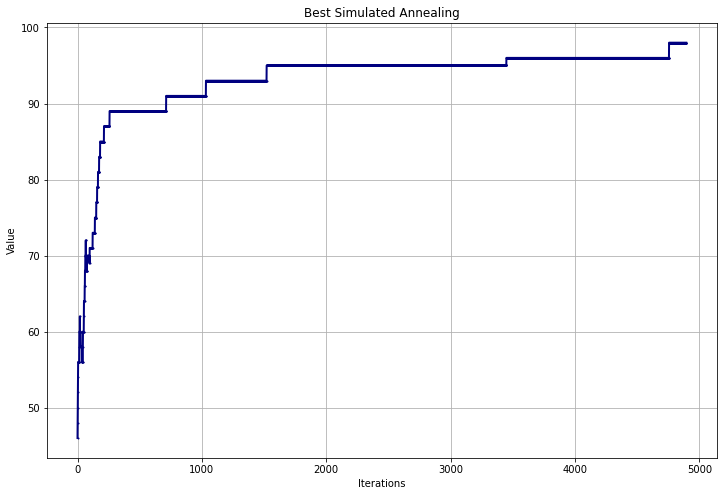

In [8]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Simulated Annealing')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [9]:
start = time()
ga = mlrose_hiive.GARunner(problem=flipflop,
                          experiment_name="flip-flip-ga",
                          seed=seed,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[20,50,100],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run() 
end = time()
print(f"Flip Flop GA Time Taken: {end-start}s")

Flip Flop GA Time Taken: 3.6551663875579834s


In [11]:
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean and time-mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean and time-mean
90.0 86.55555555555556 0.4008757333333379
Mutation Rate
0.10    85.666667
0.25    85.666667
0.50    88.333333
Name: Fitness, dtype: float64
Population Size
20     84.666667
50     86.666667
100    88.333333
Name: Fitness, dtype: float64
Population Size
20     0.242526
50     0.415622
100    0.544479
Name: Time, dtype: float64


In [12]:
start = time()
mmc = mlrose_hiive.MIMICRunner(problem=flipflop,
                          experiment_name="MMC_Exp",
                          seed=seed,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[20,50,100],
                          keep_percent_list=[0.25, 0.5, 0.75],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()
end = time()
print(f"Flip Flop MIMIC Time Taken: {end-start}s")

Flip Flop MIMIC Time Taken: 27.04333472251892s


In [13]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
85.0 73.11111111111111 3.001993577777777
Keep Percent
0.25    71.000000
0.50    75.000000
0.75    73.333333
Name: Fitness, dtype: float64
Population Size
20     67.333333
50     72.333333
100    79.666667
Name: Fitness, dtype: float64
Population Size
20     2.010595
50     2.726461
100    4.268925
Name: Time, dtype: float64


In [3]:
knapsack_len=200
# weights between 10 to 40
knapsack_weights=np.random.uniform(10,40,knapsack_len)
# values between 20 to 30
knapsack_values=np.random.uniform(20,30,knapsack_len)
max_weight_pct = 0.5
problem = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

In [15]:
start = time()
# DiscreteOpt() takes integers in range 0 to max_val-1

runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list=[10000],
                                       seed=44, max_attempts=100, 
                                       restart_list=[100])
rhc_run_stats, rhc_run_curves = runner_return.run()
end = time()
print(end-start)

25.204540967941284


In [16]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

7.0

Text(0, 0.5, 'Value')

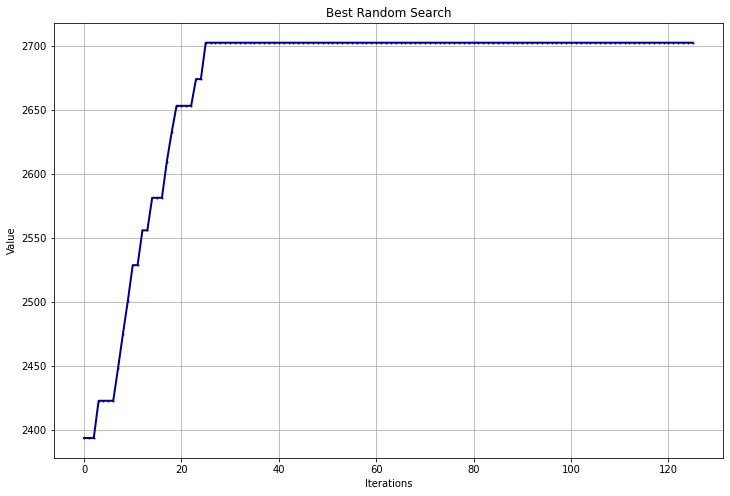

In [17]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [18]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.max())

1599.5613266318162 2702.6756801780593
25.18306040000016


In [19]:
%%time
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=[100000],
                           temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=44, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()   

Wall time: 2.33 s


In [20]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.mean())

2657.5904326844593 2801.142398776996
0.1167900944444682


In [21]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

ExpDecay(init_temp=250, exp_const=0.005, min_temp=0.001)

Text(0, 0.5, 'Value')

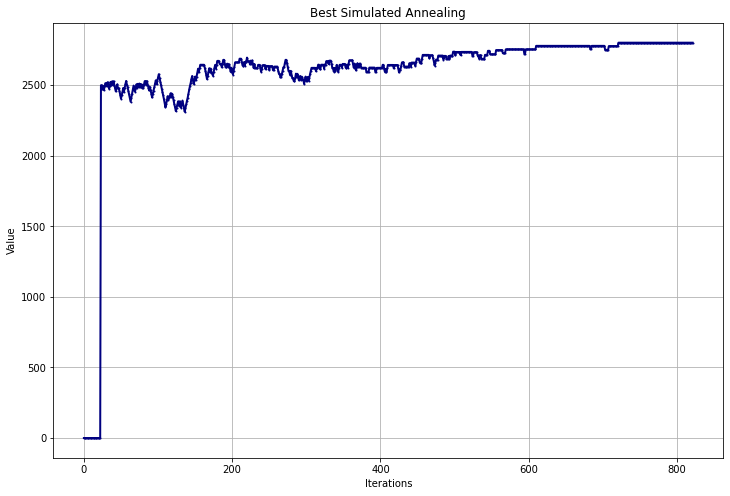

In [22]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Simulated Annealing')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [23]:
%%time
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[500, 1000],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()   

Wall time: 1min 13s


In [24]:
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
3318.6852115591482 3315.8756171433265 12.200542616666704
Mutation Rate
0.10    3317.545381
0.25    3314.316022
0.50    3315.765448
Name: Fitness, dtype: float64
Population Size
500     3315.653284
1000    3316.097950
Name: Fitness, dtype: float64
Population Size
500      9.322488
1000    15.078597
Name: Time, dtype: float64


In [4]:
start = time()
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name="MMC_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[500,1000],
                          keep_percent_list=[0.1, 0.25, 0.5],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()
end = time()
print(end-start)

419.891015291214


In [5]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
3222.4488449001606 3206.4378037500633 69.99321016666667
Keep Percent
0.10    3200.771621
0.25    3214.424912
0.50    3204.116879
Name: Fitness, dtype: float64
Population Size
500     3192.379650
1000    3220.495957
Name: Fitness, dtype: float64
Population Size
500     46.83991
1000    93.14651
Name: Time, dtype: float64


## Four Peaks Problem

In [3]:
import time

In [3]:
fitness = mlrose_hiive.FourPeaks(t_pct=0.1)
problem = mlrose_hiive.DiscreteOpt(length=40, fitness_fn=fitness, maximize=True, max_val=2)

In [8]:
start = time()
# DiscreteOpt() takes integers in range 0 to max_val-1

runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list=[10000],
                                       seed=44, max_attempts=100, 
                                       restart_list=[100])
rhc_run_stats, rhc_run_curves = runner_return.run()
end = time()
print(end-start)

331.59712958335876


In [9]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.max())

24.554455445544555 75.0
331.5100518


In [7]:
%%time
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=[100000],
                           temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=44, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()   

Wall time: 10.5 s


In [10]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.mean())

69.16666666666667 75.0
0.5655120444444424


In [6]:
%%time
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[500, 1000],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()   

Wall time: 31.2 s


In [11]:
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
75.0 75.0 5.197842433333332
Mutation Rate
0.10    75.0
0.25    75.0
0.50    75.0
Name: Fitness, dtype: float64
Population Size
500     75.0
1000    75.0
Name: Fitness, dtype: float64
Population Size
500     3.291221
1000    7.104464
Name: Time, dtype: float64


In [5]:
start = time()
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name="MMC_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[500,1000],
                          keep_percent_list=[0.1, 0.25, 0.5],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()
end = time()
print(end-start)

28.825287580490112


In [12]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
75.0 66.5 4.803325583333333
Keep Percent
0.10    69.0
0.25    72.0
0.50    58.5
Name: Fitness, dtype: float64
Population Size
500     64.0
1000    69.0
Name: Fitness, dtype: float64
Population Size
500     2.989958
1000    6.616693
Name: Time, dtype: float64
